In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

%precision 3
%matplotlib inline

In [116]:
wine = pd.read_csv("winequality-red.csv", sep=";")

#### scikit-learn

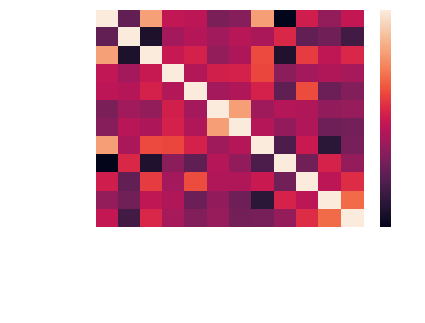

In [43]:
sns.heatmap(wine.corr())

[-280.164]
289.67534338256445
0.2461943643971065


/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


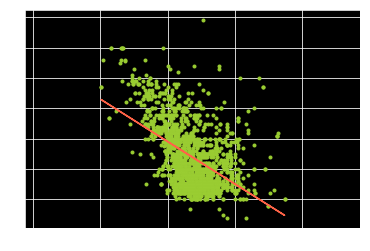

In [117]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = wine.loc[:, ['density']].as_matrix()
y = wine['alcohol'].as_matrix()
clf.fit(X, y)
print(clf.coef_) 
print(clf.intercept_)
print(clf.score(X, y))
plt.scatter(X, y, marker='.', color="yellowgreen")
plt.plot(X, clf.predict(X), color="tomato")

#### numpy

In [11]:
X.shape

(1599, 1)

In [29]:
X2 = np.hstack([np.ones(len(X)).reshape(-1,1),X])

In [34]:
coefficent = np.linalg.lstsq(X2,y)[0]

/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [30]:
X2

array([[1.   , 0.998],
       [1.   , 0.997],
       [1.   , 0.997],
       ...,
       [1.   , 0.996],
       [1.   , 0.995],
       [1.   , 0.995]])

In [37]:
np.dot(X2, coefficent)

array([10.128, 10.408, 10.352, ..., 10.705, 10.781, 10.775])

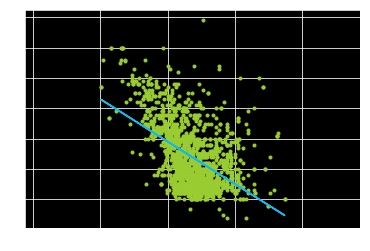

In [39]:
plt.scatter(X, y, marker='.', color="yellowgreen")
plt.plot(X, np.dot(X2, coefficent), color="tomato")
plt.plot(X, clf.predict(X), color="deepskyblue")

In [51]:
U,S,V = np.linalg.svd(X2)

In [52]:
print(X2.shape)
print(U.shape)
print(S.shape)
print(V.shape)

(1599, 2)
(1599, 1599)
(2,)
(2, 2)


In [54]:
SS = np.zeros(X2.shape)
diag = np.diag(S)

In [60]:
SS[:diag.shape[0], :diag.shape[1]] = diag

In [74]:
SSinv = np.zeros(X2.T.shape)
SSinv[:diag.shape[0], :diag.shape[1]] = np.diag(1/S)

In [81]:
C = np.dot(np.dot(V.T, SSinv), U)

In [85]:
w = np.dot(C,y)

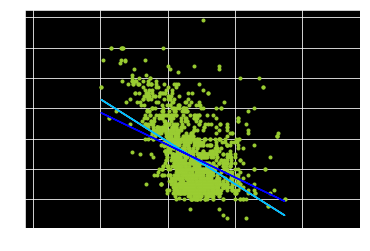

In [88]:
plt.scatter(X, y, marker='.', color="yellowgreen")
plt.plot(X, np.dot(X2, coefficent), color="tomato")
plt.plot(X, clf.predict(X), color="deepskyblue")
plt.plot(X, np.dot(X2, w), color="blue")

In [90]:
def mse(y, y_):
    return ((y - y_)**2).mean()

In [91]:
mse(y, np.dot(X2, coefficent))

0.8555220359235431

In [92]:
mse(y, np.dot(X2, w))

0.8711257380297185

In [93]:
mse(y, clf.predict(X))

0.8555220359235431

In [94]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [95]:
from sklearn import datasets
wine_data = datasets.load_wine()
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
X=wine.loc[:,['total_phenols']].as_matrix()
y=wine['flavanoids'].as_matrix()

/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


#### numpyによる解

In [118]:
X2 = np.hstack([np.ones(len(X)).reshape(-1,1),X])
coefficent = np.linalg.lstsq(X2,y)[0]

/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


#### scikit-learnによる解

In [119]:
clf = linear_model.LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 特異値分解を使用した解放

In [120]:
U,S,V = np.linalg.svd(X2)
SSinv = np.zeros(X2.T.shape)
SSinv[:diag.shape[0], :diag.shape[1]] = np.diag(1/S)
C = np.dot(np.dot(V.T, SSinv), U.T)
w = np.dot(C,y)

#### 逆行列を使用した解放

In [121]:
ATAinv = np.linalg.inv(np.dot(X2.T, X2))
ww = np.dot(np.dot(ATAinv, X2.T), y)

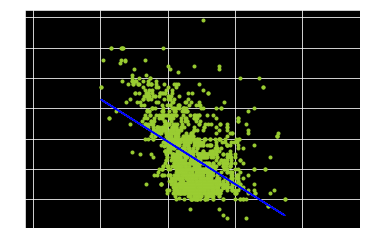

In [122]:
plt.scatter(X, y, marker='.', color="yellowgreen")
plt.plot(X, np.dot(X2, coefficent), color="tomato")
plt.plot(X, clf.predict(X), color="deepskyblue")
plt.plot(X, np.dot(X2, w), color="blue")